In [1]:
import gzip
import json
import shutil
from collections import defaultdict
from ftplib import FTP

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
FTP_HOST = 'ftp.ncbi.nih.gov'

# genes
FTP_GENES_PATH = '/gene/DATA/GENE_INFO/Mammalia/'
FTP_GENES = 'Homo_sapiens.gene_info.gz'
GENES_NAME = FTP_GENES[:-3] + '.tsv'

# genes to pubmed
FTP_MAP_PATH = '/gene/DATA/'
FTP_MAP = 'gene2pubmed.gz'
MAP_NAME = 'gene2pubmed.tsv'

In [3]:
# ftp = FTP(FTP_HOST)
# ftp.login()
    
# with open(FTP_GENES, 'wb') as fp:
#     ftp.cwd(FTP_GENES_PATH)
#     ftp.retrbinary(f'RETR {FTP_GENES}', fp.write)

# with open(FTP_MAP, 'wb') as fp:
#     ftp.cwd(FTP_MAP_PATH)
#     ftp.retrbinary(f'RETR {FTP_MAP}', fp.write)

# with gzip.open(FTP_GENES, 'rb') as f_in:
#     with open(GENES_NAME, 'wb') as f_out:
#         shutil.copyfileobj(f_in, f_out)

# with gzip.open(FTP_MAP, 'rb') as f_in:
#     with open(MAP_NAME, 'wb') as f_out:
#         shutil.copyfileobj(f_in, f_out)

In [4]:
genes = pd.read_table(GENES_NAME)
gene_set = set(genes['GeneID'])

---

In [5]:
# genes_to_pubmed = defaultdict(list)
# with open(MAP_NAME) as mp:
#     next(mp)
#     for line in mp:
#         spltd = line.split('\t')
#         gene = int(spltd[1])
#         pmid = spltd[2].strip()
#         if gene in gene_set:
#             genes_to_pubmed[gene].append(pmid)
# genes_to_pubmed = dict(sorted(genes_to_pubmed.items(), key=lambda item: len(item[1]), reverse=True))
# names = genes.set_index('GeneID')['Symbol'].to_dict()
# genes_to_pubmed = {names[k]: v for k, v in genes_to_pubmed.items()}
# with open('genes_to_pubmed.json', 'w') as f:
#     json.dump(genes_to_pubmed, f)

In [6]:
with open('genes_to_pubmed.json') as f:
    genes_to_pubmed = json.load(f)

In [7]:
housekeeping = pd.read_table('tissue_category_rna_Any_Detected.tsv')
housekeeping_genes = set(housekeeping['Gene'])

/home/aparfenenkova/user_venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3364: DtypeWarning: Columns (46) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [8]:
len(housekeeping_genes)

8838

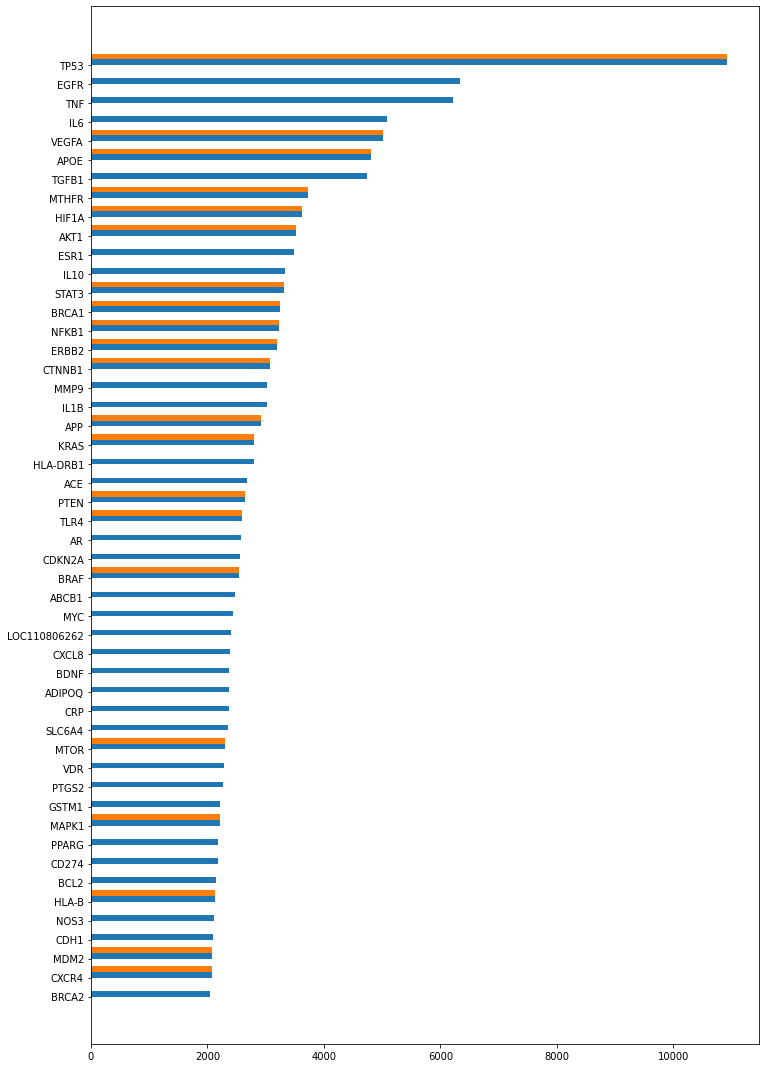

In [9]:
LIMITER = 50

labels = list(genes_to_pubmed.keys())[:LIMITER]
X = [len(x) for x in genes_to_pubmed.values()][:LIMITER]
Y = np.arange(len(labels))

X_HOUSE = list()
for l, x in zip(labels, X):
    if l in housekeeping_genes:
        X_HOUSE.append(x)
    else:
        X_HOUSE.append(0)

width = 0.3
padding = 2

fig, ax = plt.subplots(figsize=(10, 15))
plt.tight_layout()

ax.barh(Y + width/2, X, width)
ax.barh(Y - width/2, X_HOUSE, width)

ax.set(yticks=Y + width, yticklabels=labels)
ax = plt.gca()
ax.invert_yaxis()

---

In [10]:
hp_info = dict()
for k, v in genes_to_pubmed.items():
    if k in housekeeping_genes:
        hp_info[k] = v

<BarContainer object of 50 artists>

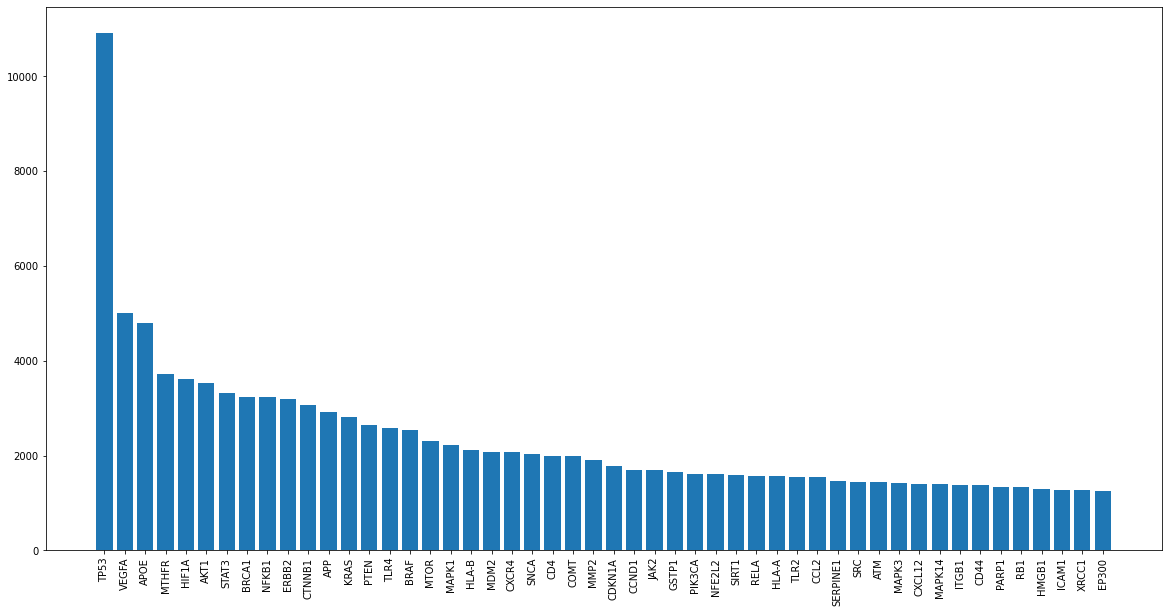

In [11]:
LIMITER = 50

labels = list(hp_info.keys())[:LIMITER]
X = [len(x) for x in hp_info.values()][:LIMITER]

plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
plt.bar(
    labels,
    X,
)

In [12]:
THRESH = 500

counter = 0
hp_pubmed = list()
for k, v in hp_info.items():
    if len(v) > THRESH:
        counter += 1
        hp_pubmed.append(k)
print('Housekeeping genes: ', counter)
print(', '.join(hp_pubmed))

Housekeeping genes:  228
TP53, VEGFA, APOE, MTHFR, HIF1A, AKT1, STAT3, BRCA1, NFKB1, ERBB2, CTNNB1, APP, KRAS, PTEN, TLR4, BRAF, MTOR, MAPK1, HLA-B, MDM2, CXCR4, SNCA, CD4, COMT, MMP2, CDKN1A, CCND1, JAK2, GSTP1, PIK3CA, NFE2L2, SIRT1, RELA, HLA-A, TLR2, CCL2, SERPINE1, SRC, ATM, MAPK3, CXCL12, MAPK14, ITGB1, CD44, PARP1, RB1, HMGB1, ICAM1, XRCC1, EP300, SP1, JUN, UBC, FAS, RAC1, SOD1, CASP3, NR3C1, HDAC1, HSP90AA1, HMOX1, IL18, RHOA, BAX, CDKN1B, MLH1, STAT1, PTK2, MAPK8, NPM1, HSPA5, APC, SOD2, SMAD3, CREBBP, LMNA, FTO, CASP8, LGALS3, TNFSF10, EDN1, GRB2, ERCC2, IDH1, ABL1, SQSTM1, TARDBP, CDK2, PTPN11, CFH, VHL, PCNA, MSH2, LDLR, PSEN1, SMAD4, CSNK2A1, PRNP, PIK3R1, HBB, HSPA4, MIF, ABCA1, TCF7L2, FMR1, HRAS, CD14, FLT1, TNFRSF1A, HSPA8, MCL1, VIM, HTT, PRKDC, MGMT, TRAF6, ALDH2, BCL2L1, ERCC1, CBL, IGFBP3, FOXO3, FOXO1, TIMP1, CDC42, FGFR1, AHR, HDAC2, INSR, LEPR, CREB1, HSPB1, SERPINA1, VCP, MECP2, PRKCD, APEX1, BSG, SMAD2, NFKBIA, PRKACA, ACTB, PKM, C3, F8, ITGAV, CDK4, RAF1, ANX

---

In [13]:
xls = pd.ExcelFile('genes_528.xlsx')
need_gain = pd.read_excel(xls, '1_need_gain_genes')
need_loss = pd.read_excel(xls, '1_need_loss_genes')

In [14]:
THRESH = 500

need_gain_pubmed = list()
need_loss_pubmed = list()
for k, v in genes_to_pubmed.items():
    if len(v) > THRESH:
        if k in set(need_gain['gene']):
            need_gain_pubmed.append(k)
        elif k in set(need_loss['gene']):
            need_loss_pubmed.append(k)
print('gain: ')
print(', '.join(need_gain_pubmed))

print('\n')

print('loss: ')
print(', '.join(need_loss_pubmed))

gain: 
PTEN, PPARG, MAPK8, SUMO1, EGR1


loss: 
ERBB2, IKBKB


In [15]:
print('gain housekeeping: ')
for x in need_gain_pubmed:
    if x in hp_pubmed:
        print(x)

print('\n')

print('loss housekeeping: ')
for x in need_loss_pubmed:
    if x in hp_pubmed:
        print(x)

gain housekeeping: 
PTEN
MAPK8
SUMO1
EGR1


loss housekeeping: 
ERBB2
IKBKB


---

In [16]:
genes

,#tax_id,GeneID,Symbol,LocusTag,Synonyms,dbXrefs,chromosome,map_location,description,type_of_gene,Symbol_from_nomenclature_authority,Full_name_from_nomenclature_authority,Nomenclature_status,Other_designations,Modification_date,Feature_type
0,9606,1,A1BG,-,A1B|ABG|GAB|HYST2477,MIM:138670|HGNC:HGNC:5|Ensembl:ENSG00000121410...,19,19q13.43,alpha-1-B glycoprotein,protein-coding,A1BG,alpha-1-B glycoprotein,O,alpha-1B-glycoprotein|HEL-S-163pA|epididymis s...,20220408,-
1,9606,2,A2M,-,A2MD|CPAMD5|FWP007|S863-7,MIM:103950|HGNC:HGNC:7|Ensembl:ENSG00000175899...,12,12p13.31,alpha-2-macroglobulin,protein-coding,A2M,alpha-2-macroglobulin,O,alpha-2-macroglobulin|C3 and PZP-like alpha-2-...,20220408,-
2,9606,3,A2MP1,-,A2MP,HGNC:HGNC:8|Ensembl:ENSG00000256069|AllianceGe...,12,12p13.31,alpha-2-macroglobulin pseudogene 1,pseudo,A2MP1,alpha-2-macroglobulin pseudogene 1,O,pregnancy-zone protein pseudogene,20220408,-
3,9606,9,NAT1,-,AAC1|MNAT|NAT-1|NATI,MIM:108345|HGNC:HGNC:7645|Ensembl:ENSG00000171...,8,8p22,N-acetyltransferase 1,protein-coding,NAT1,N-acetyltransferase 1,O,arylamine N-acetyltransferase 1|N-acetyltransf...,20220411,-
4,9606,10,NAT2,-,AAC2|NAT-2|PNAT,MIM:612182|HGNC:HGNC:7646|Ensembl:ENSG00000156...,8,8p22,N-acetyltransferase 2,protein-coding,NAT2,N-acetyltransferase 2,O,arylamine N-acetyltransferase 2|N-acetyltransf...,20220408,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74622,741158,8923215,trnD,-,-,-,MT,-,tRNA,tRNA,-,-,-,-,20200909,-
74623,741158,8923216,trnP,-,-,-,MT,-,tRNA,tRNA,-,-,-,-,20200909,-
74624,741158,8923217,trnA,-,-,-,MT,-,tRNA,tRNA,-,-,-,-,20200909,-
74625,741158,8923218,COX1,-,-,-,MT,-,cytochrome c oxidase subunit I,protein-coding,-,-,-,cytochrome c oxidase subunit I,20200909,-


In [17]:
a = 'ccc'
b = 'aaa'

def lev(a, b):
    if len(b) == 0:
        return len(a)
    elif len(a) == 0:
        return len(b)
    elif a[0] == b[0]:
        return lev(a[1:], b[1:])
    else:
        return 1 + min([
            lev(a[1:], b),
            lev(a, b[1:]),
            lev(a[1:], b[1:]),
        ])
lev(a, b)

3

In [18]:
symbols = set(genes['Symbol'])

In [27]:
%%time
similar = defaultdict(list)
counter = 0
for s in symbols:
    counter += 1
    print(counter)
    subcounter = 0
    for check in symbols:
        distance = lev(s, check)
        if distance < 3 and s != check:
            similar[s].append(check)
        subcounter += 1
        print('\t', subcounter)
        if subcounter > 100:
            break
    if counter > 10:
        break

1
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	 24
	 25
	 26
	 27
	 28
	 29
	 30
	 31
	 32
	 33
	 34
	 35
	 36
	 37
	 38
	 39
	 40
	 41
	 42
	 43
	 44
	 45
	 46
	 47
	 48
	 49
	 50
	 51
	 52
	 53
	 54
	 55
	 56
	 57
	 58
	 59
	 60
	 61
	 62
	 63
	 64
	 65
	 66
	 67
	 68
	 69
	 70
	 71
	 72
	 73
	 74
	 75
	 76
	 77
	 78
	 79
	 80
	 81
	 82
	 83
	 84
	 85
	 86
	 87
	 88
	 89
	 90
	 91
	 92
	 93
	 94
	 95
	 96
	 97
	 98
	 99
	 100
	 101
2
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	 24
	 25
	 26
	 27
	 28
	 29
	 30
	 31
	 32
	 33
	 34
	 35
	 36
	 37
	 38
	 39
	 40
	 41
	 42
	 43
	 44
	 45
	 46
	 47
	 48
	 49
	 50
	 51
	 52
	 53
	 54
	 55
	 56
	 57
	 58
	 59
	 60
	 61
	 62
	 63
	 64
	 65
	 66
	 67
	 68
	 69
	 70
	 71
	 72
	 73
	 74
	 75
	 76
	 77
	 78
	 79
	 80
	 81
	 82
	 83
	 84
	 85
	 86
	 87
	 88
	 89
	 90
	 91
	 92
	 93
	 94
	 95
	 96
	 97
	 98
	 99
	 100
	 101


In [22]:
similar

defaultdict(list, {})